# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
import sys
print(sys.path)

['/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code', '/Users/kevingiraldo/anaconda3/lib/python310.zip', '/Users/kevingiraldo/anaconda3/lib/python3.10', '/Users/kevingiraldo/anaconda3/lib/python3.10/lib-dynload', '', '/Users/kevingiraldo/anaconda3/lib/python3.10/site-packages', '/Users/kevingiraldo/anaconda3/lib/python3.10/site-packages/PyQt5_sip-12.11.0-py3.10-macosx-10.9-x86_64.egg']


In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
# 
my_btc = 1.2 
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
btc = requests.get(btc_url).json()
btc_price = btc['data'] ['1'] ['quotes'] ['USD'] ['price']

# Fetch current ETH price
eth = requests.get(eth_url).json()
eth_price = eth['data'] ['1027'] ['quotes'] ['USD'] ['price']

# Compute current value of my crpto
my_btc_value = btc_price*my_btc
my_eth_value = eth_price*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $31274.40
The current value of your 5.3 ETH is $8761.01


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

In [9]:
print(alpaca_api_key)

AK0U8DYTIKQOK4ZJ6Y6X


In [10]:
print(alpaca_secret_key)

gBV4qFn9ng5keDoLrikcqFpMlVrE2A48kLecZpzQ


In [11]:
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = 'v2') 

In [12]:
# Format current date as ISO format
date=pd.Timestamp('2020-05-01',tz='America/New_York').isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df=alpaca.get_bars(tickers,timeframe,start=date).df
df
# Reorganize the DataFrame
# Separate ticker data
agg = df[df['symbol']=='AGG'].drop('symbol', axis=1)
spy = df[df['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df=pd.concat([agg,spy],axis=1,keys=['AGG','SPY'])

# Preview DataFrame
df

AGG                                         
                              open      high       low   close    volume   
timestamp                                                                  
2020-05-01 04:00:00+00:00  116.970  117.0998  116.6775  116.87   6099551  \
2020-05-04 04:00:00+00:00  116.890  117.0900  116.8700  116.97   3684081   
2020-05-05 04:00:00+00:00  116.960  116.9700  116.8100  116.88   4611519   
2020-05-06 04:00:00+00:00  116.440  116.7100  116.3000  116.41   6394949   
2020-05-07 04:00:00+00:00  116.610  116.7700  116.4200  116.77   3786651   
...                            ...       ...       ...     ...       ...   
2023-08-21 04:00:00+00:00   95.255   95.3000   95.0400   95.14  13362319   
2023-08-22 04:00:00+00:00   95.170   95.3200   95.0600   95.24   6156222   
2023-08-23 04:00:00+00:00   95.750   96.1500   95.7310   96.15   7831606   
2023-08-24 04:00:00+00:00   95.990   96.1200   95.8500   95.93   8242884   
2023-08-25 04:00:00+00:00   95.820   96.0800   95.5957   95.87   7877293   

                                                      SPY                       
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24394  116.846121  285.31  290.6572  281.5200  \
2020-05-04 04:00:00+00:00       15545  116.960599  280.73  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15146  116.879640  286.64  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.05  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15963  116.641826  287.75  289.7800  287.1300   
...                               ...         ...     ...       ...       ...   
2023-08-21 04:00:00+00:00       42137   95.119447  437.55  440.1100  435.3200   
2023-08-22 04:00:00+00:00       28446   95.230965  441.18  441.1800  437.5700   
2023-08-23 04:00:00+00:00       31730   96.008053  439.25  443.6700  439.1000   
2023-08-24 04:00:00+00:00       25123   95.937292  444.69  445.2200  436.8550   
2023-08-25 04:00:00+00:00       30113   95.842433  438.68  441.3000  435.0000   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.83  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.59   80882213      460681  281.765334  
2020-05-05 04:00:00+00:00  286.15   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.34   73632628      436219  286.096273  
2020-05-07 04:00:00+00:00  287.70   75250412      422688  287.989956  
...                           ...        ...         ...         ...  
2023-08-21 04:00:00+00:00  439.34   68735324      525383  437.971885  
2023-08-22 04:00:00+00:00  438.15   65073788      476409  438.849064  
2023-08-23 04:00:00+00:00  443.03   68441021      469242  441.907016  
2023-08-24 04:00:00+00:00  436.89   88065473      581420  440.152810  
2023-08-25 04:00:00+00:00  439.97  101432685      643199  438.784107  

[836 rows x 14 columns]

In [15]:
# Pick AGG and SPY close prices
agg_close_price = df["AGG"]["close"][-1]
spy_close_price = df["SPY"]["close"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.87
Current SPY closing price: $439.97


In [17]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21998.50
The current value of your 200 AGG shares is $19174.00


### Savings Health Analysis

In [18]:
## Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,40035.406
shares,41172.500


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

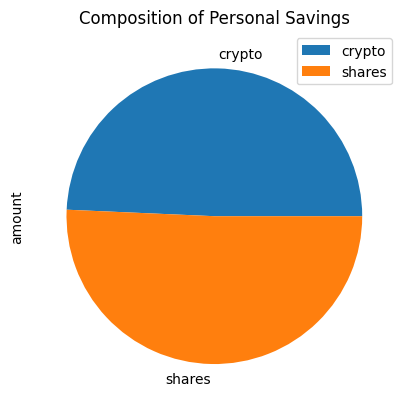

In [19]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of Personal Savings')

In [22]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif total_savings == emergency_fund:
    print('Great, You have saved three times your monthly expenses! Keep pushing to increase your savings.')
else:
    print(f'You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund goal, continue saving between 10% and ')

Congratulations! You have enough money in your emergency fund.


/var/folders/53/8c8ndl7n0n12sv75ng8kmxgc0000gn/T/ipykernel_41222/2868535941.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  total_savings = float(df_savings.sum())


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [26]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-05-01', tz='America/New_York').isoformat()

In [28]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]

df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)



# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_ticker.head()

AGG                                    
                             open    high     low   close   volume   
timestamp                                                            
2018-05-01 04:00:00+00:00  105.73  105.79  105.60  105.67  3027047  \
2018-05-02 04:00:00+00:00  105.70  105.78  105.62  105.67  2560754   
2018-05-03 04:00:00+00:00  105.82  105.95  105.78  105.79  4499248   
2018-05-04 04:00:00+00:00  105.92  105.93  105.71  105.86  2317096   
2018-05-07 04:00:00+00:00  105.88  105.88  105.77  105.81  1533669   

                                                      SPY                     
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2018-05-01 04:00:00+00:00       11964  105.661470  263.87  265.1000  262.11  \
2018-05-02 04:00:00+00:00       11838  105.678072  264.76  265.6800  262.76   
2018-05-03 04:00:00+00:00       14801  105.875731  262.26  263.3600  259.05   
2018-05-04 04:00:00+00:00        9990  105.825193  261.52  266.7892  261.15   
2018-05-07 04:00:00+00:00        7643  105.816832  266.89  268.0200  266.11   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2018-05-01 04:00:00+00:00  264.96   76110600      296318  263.924372  
2018-05-02 04:00:00+00:00  263.17   86373743      300565  264.118423  
2018-05-03 04:00:00+00:00  262.59  136921861      519981  261.686187  
2018-05-04 04:00:00+00:00  265.92   91230645      326945  264.854905  
2018-05-07 04:00:00+00:00  266.92   56495099      242699  267.100589

In [31]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [32]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                    
                             open    high     low   close   volume   
timestamp                                                            
2018-05-01 04:00:00+00:00  105.73  105.79  105.60  105.67  3027047  \
2018-05-02 04:00:00+00:00  105.70  105.78  105.62  105.67  2560754   
2018-05-03 04:00:00+00:00  105.82  105.95  105.78  105.79  4499248   
2018-05-04 04:00:00+00:00  105.92  105.93  105.71  105.86  2317096   
2018-05-07 04:00:00+00:00  105.88  105.88  105.77  105.81  1533669   

                                                                   SPY   
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-05-01 04:00:00+00:00       11964  105.661470          NaN  263.87  \
2018-05-02 04:00:00+00:00       11838  105.678072     0.000000  264.76   
2018-05-03 04:00:00+00:00       14801  105.875731     0.001136  262.26   
2018-05-04 04:00:00+00:00        9990  105.825193     0.000662  261.52   
2018-05-07 04:00:00+00:00        7643  105.816832    -0.000472  266.89   

                                                                             
                               high     low   close     volume trade_count   
timestamp                                                                    
2018-05-01 04:00:00+00:00  265.1000  262.11  264.96   76110600      296318  \
2018-05-02 04:00:00+00:00  265.6800  262.76  263.17   86373743      300565   
2018-05-03 04:00:00+00:00  263.3600  259.05  262.59  136921861      519981   
2018-05-04 04:00:00+00:00  266.7892  261.15  265.92   91230645      326945   
2018-05-07 04:00:00+00:00  268.0200  266.11  266.92   56495099      242699   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-05-01 04:00:00+00:00  263.924372          NaN  
2018-05-02 04:00:00+00:00  264.118423    -0.006756  
2018-05-03 04:00:00+00:00  261.686187    -0.002204  
2018-05-04 04:00:00+00:00  264.854905     0.012681  
2018-05-07 04:00:00+00:00  267.100589     0.003761

In [33]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 110.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 120.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 130.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 140.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 150.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 160.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 170.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 180.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 190.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 200.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 210.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 220.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 230.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 240.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 250.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 260.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 270.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 280.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 290.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 300.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 310.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 320.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 330.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 340.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 350.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 360.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 370.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 380.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 390.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 400.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 410.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 420.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 430.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 440.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 450.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 460.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 470.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 480.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

Running Monte Carlo simulation number 490.


/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge Files/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/kevingiraldo/Documents/Fintech Course Materials/Module 5 Challenge 

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998413,1.009183,1.008136,1.000845,0.994918,0.999338,0.995602,0.990298,1.004550,0.994822,...,0.997056,1.008618,0.999339,1.004229,1.000862,1.004335,0.998878,0.999081,1.006175,0.994428
2,1.005103,1.007683,1.013003,1.005635,0.989081,1.004207,0.993591,0.994996,1.003567,0.990789,...,0.996218,1.008078,1.001187,1.010806,1.000410,1.006235,0.994554,0.998022,0.997798,0.997011
3,1.009626,1.009781,1.008845,0.997508,0.990504,0.995264,0.986763,1.001159,1.018044,0.986332,...,0.996383,1.004891,0.996023,1.012693,1.008595,1.006004,1.005023,0.989583,0.991569,0.995300
4,1.016817,1.012526,1.016830,1.010376,0.984237,1.006590,0.983366,1.010286,1.014582,0.983132,...,0.988841,1.002368,0.993735,1.018594,1.021008,1.002730,0.997752,0.990857,0.985163,1.000110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.210972,4.169900,1.935152,5.146557,1.293965,3.039716,7.453309,1.152074,2.212881,4.308091,...,3.223685,4.951495,4.400120,2.275312,5.694708,3.679503,4.229457,2.247264,3.871292,2.466266
7557,3.218827,4.132104,1.919255,5.131678,1.300303,3.075929,7.486770,1.143785,2.217637,4.283908,...,3.215765,4.965885,4.407741,2.258364,5.713935,3.680026,4.241035,2.254049,3.877117,2.469784
7558,3.215487,4.153575,1.906779,5.120035,1.299030,3.080212,7.525061,1.133309,2.204310,4.317164,...,3.212607,4.933427,4.398487,2.251262,5.639623,3.691094,4.258617,2.252499,3.888790,2.462793
7559,3.199644,4.169587,1.916926,5.077256,1.311161,3.067717,7.541549,1.123137,2.185502,4.303370,...,3.215144,4.944774,4.371110,2.258168,5.651978,3.677958,4.254389,2.243822,3.890950,2.471898


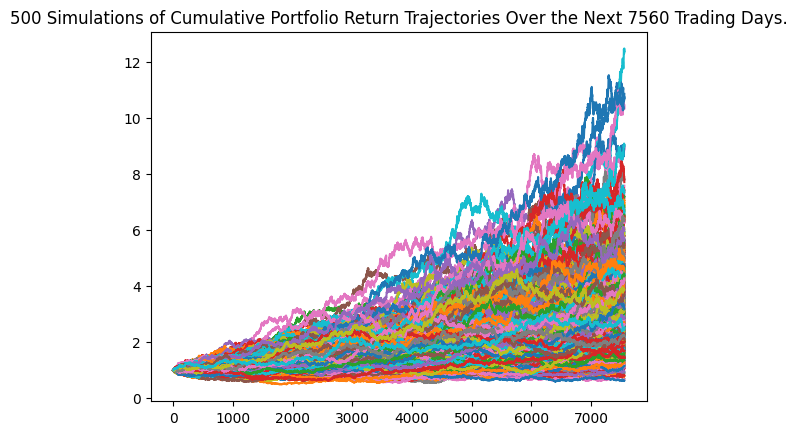

In [34]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

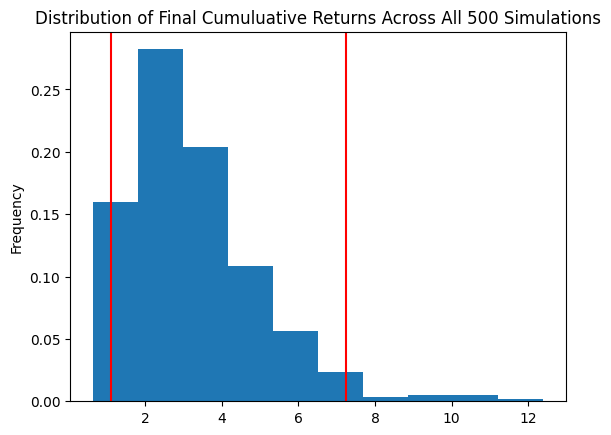

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [41]:
tbl = MC_30year.simulated_return.iloc[-1].describe()
tbl

count    500.000000
mean       3.247362
std        1.696311
min        0.627932
25%        1.998661
50%        2.876506
75%        4.089200
max       12.395870
Name: 7560, dtype: float64

In [44]:
tbl["95% CI Lower"] = MC_30year.simulated_return.iloc[-1].quantile(0.05)
tbl["95% CI Upper"] = MC_30year.simulated_return.iloc[-1].quantile(0.95)

In [45]:


# Print summary statistics
print(tbl)

count           500.000000
mean              3.247362
std               1.696311
min               0.627932
25%               1.998661
50%               2.876506
75%               4.089200
max              12.395870
95% CI Lower      1.271939
95% CI Upper      6.491734
Name: 7560, dtype: float64


In [37]:
MC_30year

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [46]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $25438.79 and $129834.68


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [48]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $38158.18 and $194752.01


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")